Import modules

In [27]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

print(tf.__version__)

2.4.1


Fashion Mnist 데이터 로드

In [28]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
# 데이터 크기 변경
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)

# 데이터 타입 변경
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [30]:
# 데이터 정규화
train_images = train_images/255
test_images = test_images/255

In [31]:
# One hot encoding
train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

모델 구성

In [67]:
model = keras.Sequential()

model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='SAME', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=2, padding='SAME'))
model.add(keras.layers.Conv2D(filters=64, kernel_size=3, padding='SAME', activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=2, padding='SAME'))
model.add(keras.layers.Conv2D(filters=128, kernel_size=3, padding='SAME', activation='relu', kernel_initializer='he_uniform'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D(pool_size=2, padding='SAME'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=256, activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dropout(rate=0.4))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [74]:
# Compile
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)        

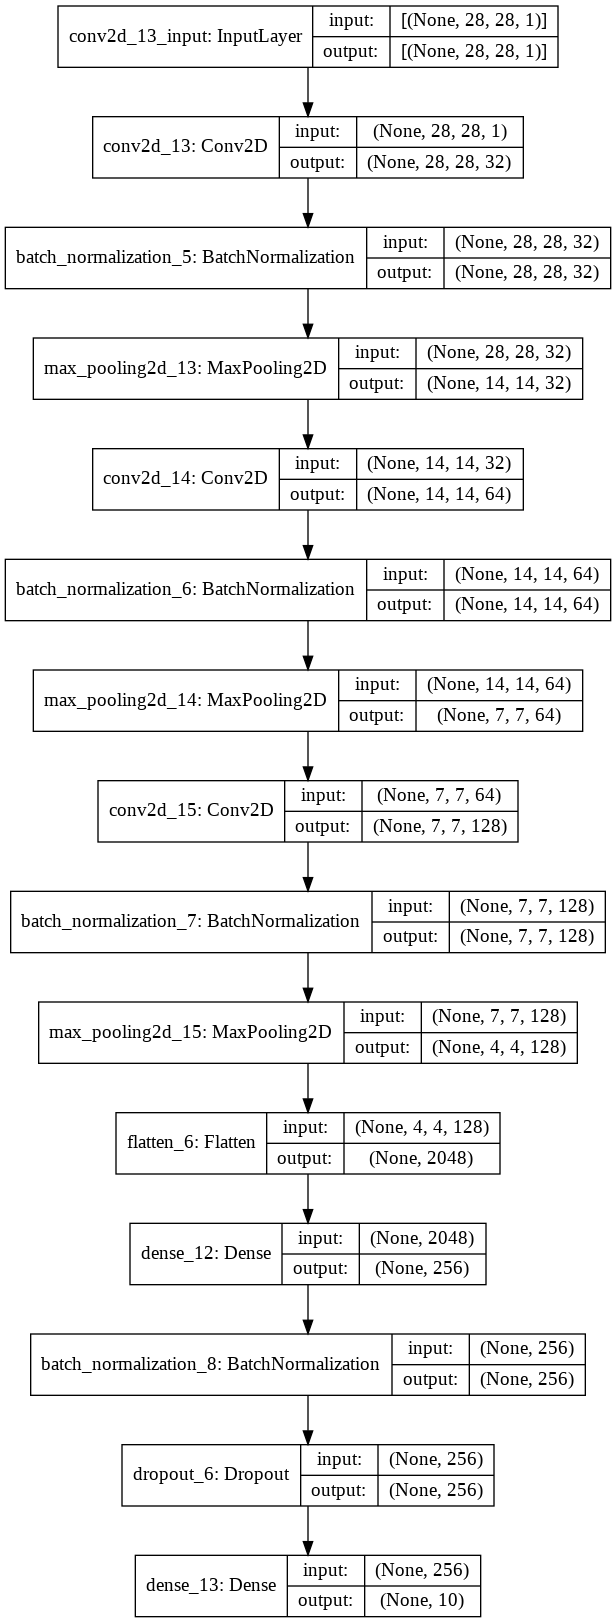

In [75]:
model.summary()
keras.utils.plot_model(model, to_file='drive/MyDrive/tensorflow/practice/fashion_model.png', show_shapes=True)

모델 학습

In [76]:
history = model.fit(train_images, train_labels, batch_size=100, epochs=15, use_multiprocessing=True, validation_data=(test_images, test_labels))

Epoch 1/15
600/600 [==============================] - 4s 6ms/step - loss: 0.0302 - accuracy: 0.9896 - val_loss: 0.4561 - val_accuracy: 0.9119
Epoch 2/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0291 - accuracy: 0.9899 - val_loss: 0.4801 - val_accuracy: 0.9100
Epoch 3/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0232 - accuracy: 0.9914 - val_loss: 0.4491 - val_accuracy: 0.9151
Epoch 4/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0217 - accuracy: 0.9917 - val_loss: 0.4335 - val_accuracy: 0.9158
Epoch 5/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0227 - accuracy: 0.9923 - val_loss: 0.4492 - val_accuracy: 0.9159
Epoch 6/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0221 - accuracy: 0.9917 - val_loss: 0.4470 - val_accuracy: 0.9154
Epoch 7/15
600/600 [==============================] - 3s 6ms/step - loss: 0.0208 - accuracy: 0.9923 - val_loss: 0.4672 - val_accuracy: 0.9122
Epoch 

In [77]:
# Evaluate
train_loss, train_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.5491 - accuracy: 0.9117


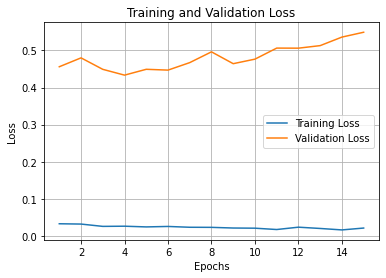

In [78]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

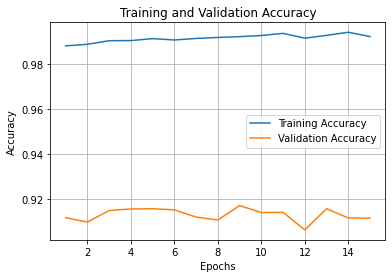

In [79]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
model.save('drive/MyDrive/tensorflow/practice/fashionModel')

INFO:tensorflow:Assets written to: drive/MyDrive/tensorflow/practice/fashionModel/assets
